# Car Price Prediction Edureka Techathon 2019

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRY5gXq0cD-5E5R1NN5jjfd4l2AaZypH9ntL09Ddciq2PWT4DcU" width="1000" height="500">

### 1. Importing the libraries

In [4]:
# Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import matplotlib
import sklearn
import sys
%matplotlib inline

In [5]:
print("Python {}".format(sys.version))
print("Numpy {}".format(np.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Pandas {}".format(pd.__version__))
print("Sklearn {}".format(sklearn.__version__))

Python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
Numpy 1.17.0
Matplotlib 3.0.3
Pandas 0.25.0
Sklearn 0.20.3


#### Reading data.csv file 

In [36]:
data = pd.read_csv('data.csv')
print("shape of data = {}".format(data.shape))

shape of data = (3390, 18)


In [3]:
data.head()

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price
0,Edureka_motors,318 Gran Turismo,140245,105,01-10-2014,diesel,white,hatchback,False,True,False,False,True,True,True,True,01-03-2018,19200
1,Edureka_motors,218 Active Tourer,91512,100,01-06-2015,petrol,white,van,False,True,True,False,False,False,True,False,01-05-2018,14300
2,Edureka_motors,318,113744,100,01-06-2012,diesel,grey,sedan,True,True,False,False,False,False,True,False,01-06-2018,14300
3,Edureka_motors,320 Gran Turismo,195063,135,01-05-2014,diesel,black,hatchback,False,True,True,False,True,False,True,True,01-03-2018,16200
4,Edureka_motors,518,148943,100,01-11-2013,diesel,brown,estate,True,True,True,False,True,False,True,True,01-05-2018,17300


### 2. Exploratory Data Analysis and data conversion

In [4]:
len(data.car_company.unique())

1

In [5]:
data[['registration_date', 'sold_date']].head()

,registration_date,sold_date
0,01-10-2014,01-03-2018
1,01-06-2015,01-05-2018
2,01-06-2012,01-06-2018
3,01-05-2014,01-03-2018
4,01-11-2013,01-05-2018


### 3. FInding Missing Values if any in the given Dataset

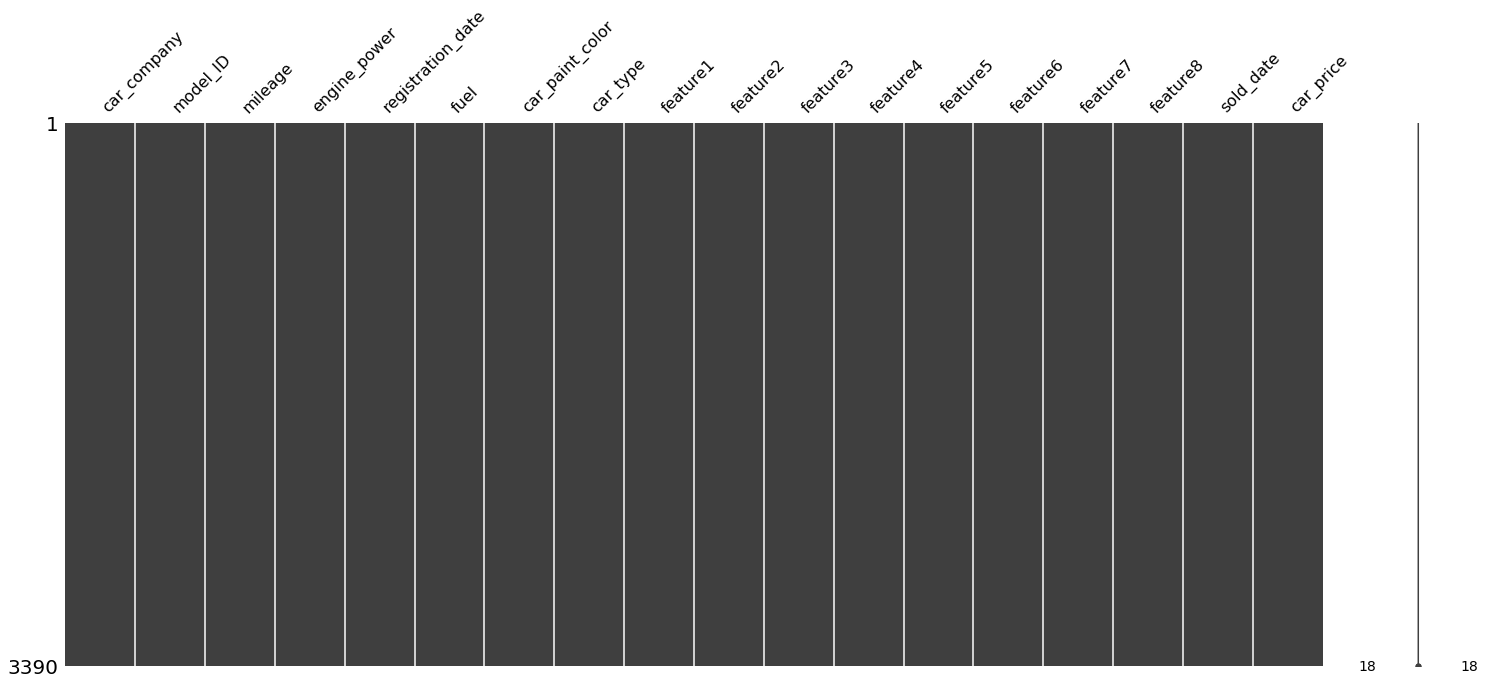

We see that no values are missing


In [37]:
missingno.matrix(data)
plt.show()

print("We see that no values are missing")

### 4. Visualising Correlation Matrix to understand the relationship between dependent and target features.

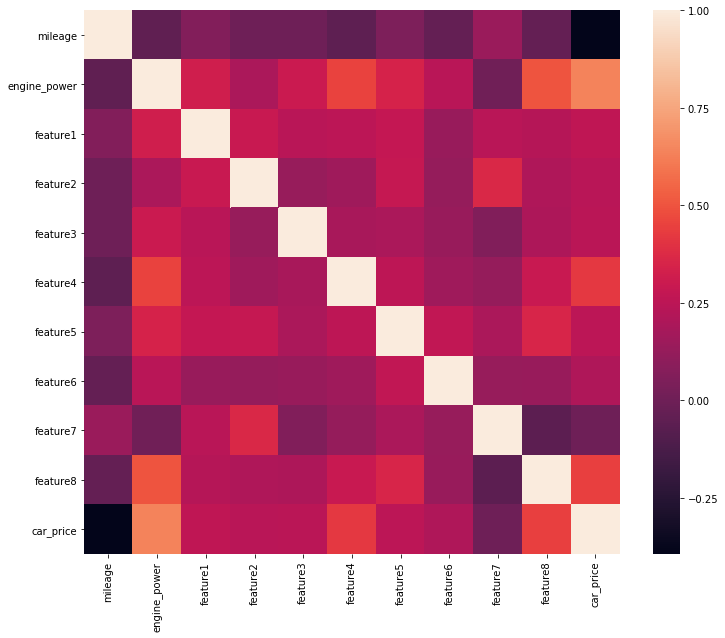

In [7]:
fig = plt.figure(figsize = (12, 10))
sns.heatmap(data.corr())
plt.show()

#### Visualising different prices for Car

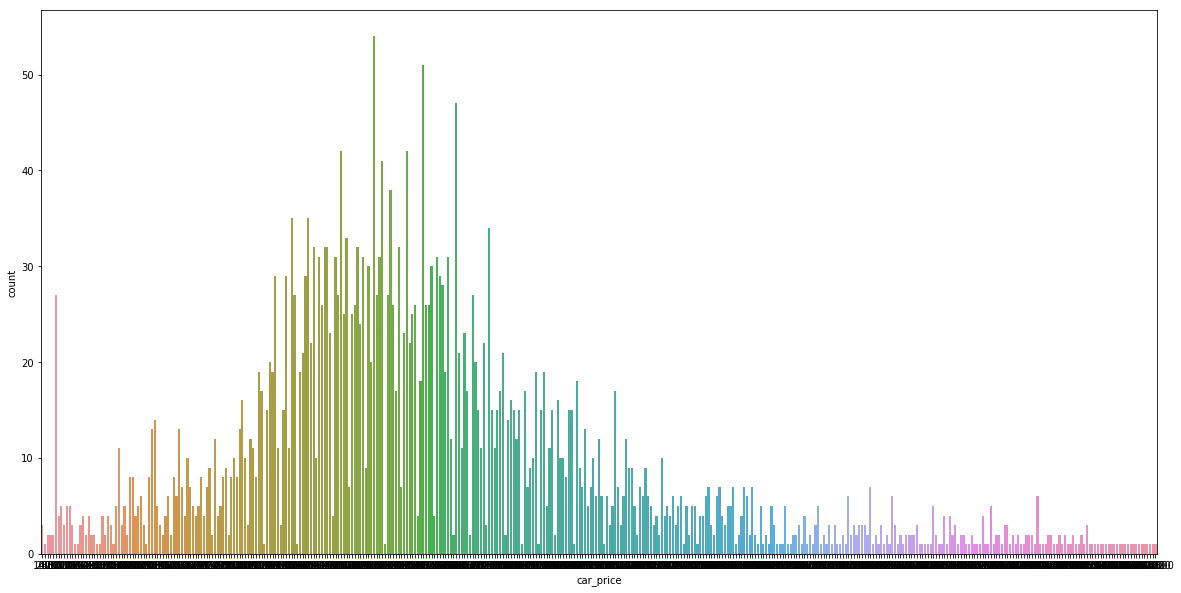

In [40]:
plt.figure(figsize = (20, 10))
sns.countplot('car_price', data=data)
plt.show()

### 5. Working with different data type variables.

#### Below we see that data types available are dtypes: bool(8), int64(3), object(7)
##### We need to convert the object type data to numerical data for model to work with.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 18 columns):
car_company          3390 non-null object
model_ID             3390 non-null object
mileage              3390 non-null int64
engine_power         3390 non-null int64
registration_date    3390 non-null object
fuel                 3390 non-null object
car_paint_color      3390 non-null object
car_type             3390 non-null object
feature1             3390 non-null bool
feature2             3390 non-null bool
feature3             3390 non-null bool
feature4             3390 non-null bool
feature5             3390 non-null bool
feature6             3390 non-null bool
feature7             3390 non-null bool
feature8             3390 non-null bool
sold_date            3390 non-null object
car_price            3390 non-null int64
dtypes: bool(8), int64(3), object(7)
memory usage: 291.5+ KB


#### First working with "date type" values, since we have "purchase date" and "selling date" we can find the number of days in between them and call as "used_days"

In [11]:
from datetime import date
def used_days(cols):
    rd, rm, ry = list(map(int, cols[0].split('-')))
    sd, sm, sy = list(map(int, cols[1].split('-')))
    d0 = date(ry, rm, rd)
    d1 = date(sy, sm, sd)
    delta = d1 - d0
    return delta.days

data['used_days'] = data[['registration_date', 'sold_date']].apply(used_days, axis=1)

In [14]:
del data['registration_date']
del data['sold_date']

In [12]:
data.head()

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price,used_days
0,Edureka_motors,318 Gran Turismo,140245,105,01-10-2014,diesel,white,hatchback,False,True,False,False,True,True,True,True,01-03-2018,19200,1247
1,Edureka_motors,218 Active Tourer,91512,100,01-06-2015,petrol,white,van,False,True,True,False,False,False,True,False,01-05-2018,14300,1065
2,Edureka_motors,318,113744,100,01-06-2012,diesel,grey,sedan,True,True,False,False,False,False,True,False,01-06-2018,14300,2191
3,Edureka_motors,320 Gran Turismo,195063,135,01-05-2014,diesel,black,hatchback,False,True,True,False,True,False,True,True,01-03-2018,16200,1400
4,Edureka_motors,518,148943,100,01-11-2013,diesel,brown,estate,True,True,True,False,True,False,True,True,01-05-2018,17300,1642


#### Second, working with Categorical Data(string type data), we can perform "One_Hot_Encoding" for variables 'car_company', 'fuel', 'car_type' as shown below

finding total number of unique values for features, to perform One_Hot_Encoding

In [39]:
print("Total unique values for 'fuel' variable = {}".format(len(data.fuel.unique())))
print("Total unique values for 'car_paint_color' variable = {}".format(len(data.car_paint_color.unique())))
print("Total unique values for 'car_type' variable = {}".format(len(data.car_type.unique())))
#fuel=4, car_paint_color=10, car_type=8

Total unique values for 'fuel' variable = 4
Total unique values for 'car_paint_color' variable = 10
Total unique values for 'car_type' variable = 8


In [15]:
dataset = data

def encode_and_bind(dataset, col):
    encoded = pd.get_dummies(dataset[col])
    dataset = pd.concat([dataset, encoded], axis=1)
    return dataset

#one_hot_cols = ['car_company', 'fuel', 'car_paint_color', 'car_type' ]
one_hot_cols = ['car_company', 'fuel', 'car_type' ]
for col in one_hot_cols:
    dataset = encode_and_bind(dataset, col)
    del dataset[col]

In [16]:
dataset.head()

,model_ID,mileage,engine_power,car_paint_color,feature1,feature2,feature3,feature4,feature5,feature6,...,hybrid_petrol,petrol,convertible,coupe,estate,hatchback,sedan,subcompact,suv,van
0,318 Gran Turismo,140245,105,white,False,True,False,False,True,True,...,0,0,0,0,0,1,0,0,0,0
1,218 Active Tourer,91512,100,white,False,True,True,False,False,False,...,0,1,0,0,0,0,0,0,0,1
2,318,113744,100,grey,True,True,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0
3,320 Gran Turismo,195063,135,black,False,True,True,False,True,False,...,0,0,0,0,0,1,0,0,0,0
4,518,148943,100,brown,True,True,True,False,True,False,...,0,0,0,0,1,0,0,0,0,0


#### Now, we perform Label_Encoding for "model_ID" and "car_paint_color" as shown below

In [17]:
len(dataset.model_ID.unique())

72

In [18]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column. 
dataset['model_ID']= label_encoder.fit_transform(dataset['model_ID'])

dataset['car_paint_color']= label_encoder.fit_transform(dataset['car_paint_color'])
  
#dataset['model_ID'].unique() 

In [19]:
dataset.head()

,model_ID,mileage,engine_power,car_paint_color,feature1,feature2,feature3,feature4,feature5,feature6,...,hybrid_petrol,petrol,convertible,coupe,estate,hatchback,sedan,subcompact,suv,van
0,20,140245,105,9,False,True,False,False,True,True,...,0,0,0,0,0,1,0,0,0,0
1,12,91512,100,9,False,True,True,False,False,False,...,0,1,0,0,0,0,0,0,0,1
2,19,113744,100,5,True,True,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0
3,22,195063,135,1,False,True,True,False,True,False,...,0,0,0,0,0,1,0,0,0,0
4,38,148943,100,3,True,True,True,False,True,False,...,0,0,0,0,1,0,0,0,0,0


In [20]:
dataset.columns

Index(['model_ID', 'mileage', 'engine_power', 'car_paint_color', 'feature1',
       'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7',
       'feature8', 'car_price', 'used_days', 'Edureka_motors', 'diesel',
       'electro', 'hybrid_petrol', 'petrol', 'convertible', 'coupe', 'estate',
       'hatchback', 'sedan', 'subcompact', 'suv', 'van'],
      dtype='object')

#### Converting bool to int type

In [21]:
def TFto01(cols):
    if cols[0]:
        return 1
    return 0
TF_cols = ['feature1', 'feature2','feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']
for col in TF_cols:
    dataset[col] = dataset[[col]].apply(TFto01, axis = 1)

In [22]:
dataset.head()

,model_ID,mileage,engine_power,car_paint_color,feature1,feature2,feature3,feature4,feature5,feature6,...,hybrid_petrol,petrol,convertible,coupe,estate,hatchback,sedan,subcompact,suv,van
0,20,140245,105,9,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,12,91512,100,9,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,19,113744,100,5,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,22,195063,135,1,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,38,148943,100,3,1,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 27 columns):
model_ID           3390 non-null int64
mileage            3390 non-null int64
engine_power       3390 non-null int64
car_paint_color    3390 non-null int64
feature1           3390 non-null int64
feature2           3390 non-null int64
feature3           3390 non-null int64
feature4           3390 non-null int64
feature5           3390 non-null int64
feature6           3390 non-null int64
feature7           3390 non-null int64
feature8           3390 non-null int64
car_price          3390 non-null int64
used_days          3390 non-null int64
Edureka_motors     3390 non-null uint8
diesel             3390 non-null uint8
electro            3390 non-null uint8
hybrid_petrol      3390 non-null uint8
petrol             3390 non-null uint8
convertible        3390 non-null uint8
coupe              3390 non-null uint8
estate             3390 non-null uint8
hatchback          3390 non-null ui

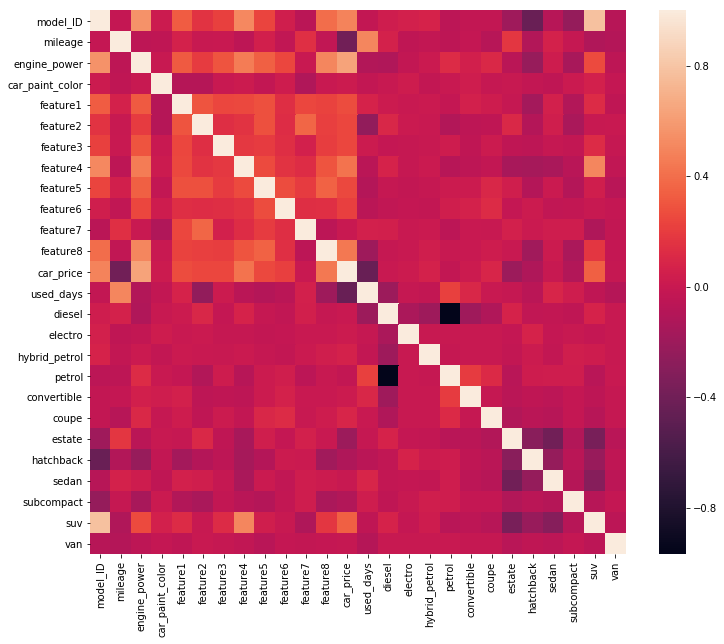

In [24]:
del dataset['Edureka_motors']

fig = plt.figure(figsize = (12, 10))
sns.heatmap(dataset.corr())
plt.show()

#### Histograms for visualising values for all the feature Variables.

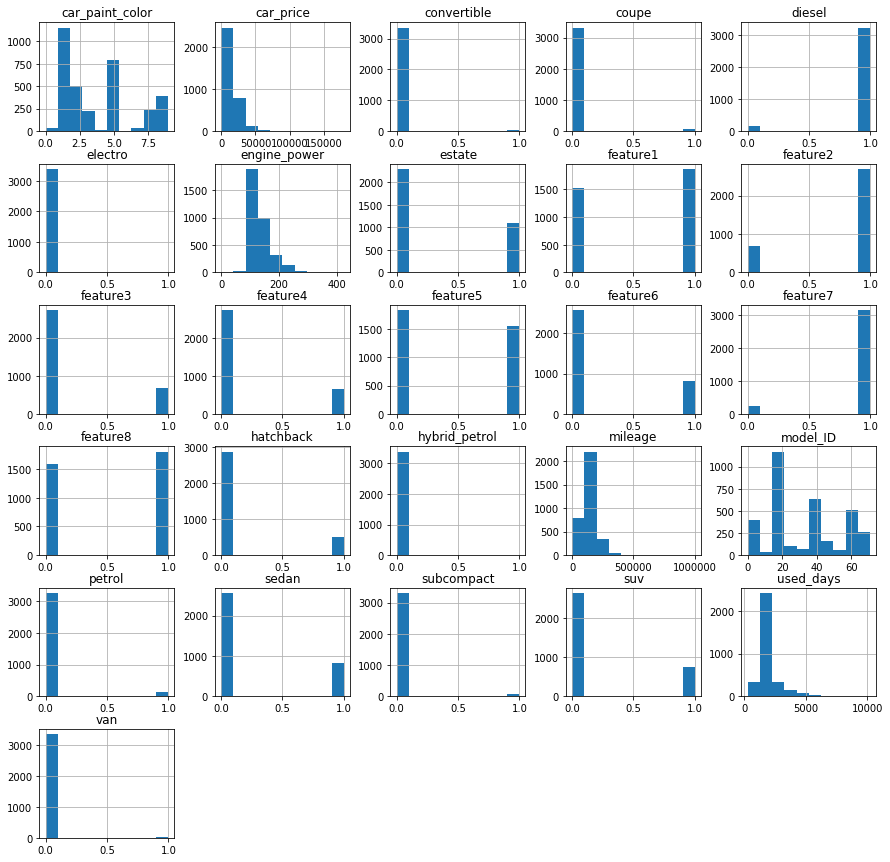

In [25]:
dataset.hist(figsize = (15, 15))
plt.show()

#### Now our data is ready to feed it to Machine Learning Model

### Since we need to predict Car_Price for given input, it is a continuous data prediction hence we can use "Supervised Learning",  So "Multiple Regression Machine Learning Model" should be fine.

### 6.Seperating Data into Train set for training ML model, and test set for testing our trained model

In [26]:
#seperate data into train and test
from sklearn.model_selection import train_test_split
y = dataset['car_price']
X = dataset.drop('car_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

#### Using sklearn Library for Linear Regression Model

In [31]:
# Fitting multiple linear regression to the training set
from sklearn.linear_model  import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Now, after traing our regressor ML model, we can use it for prediction on test set

In [32]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

### R2 Score for the trained Regressor Model

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print("r2_score = {}".format(score))

r2_score = 0.664052586764899


### 7.Summary of the Model

In [30]:
import statsmodels.api as sm

x = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              car_price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     276.7
Date:                Fri, 02 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:02:12   Log-Likelihood:                -34040.
No. Observations:                3390   AIC:                         6.813e+04
Df Residuals:                    3366   BIC:                         6.827e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7379.2585    896.427     

/home/vdhage/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Below cells take test.csv file for making predictions and stores predictions as result.csv file

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test['used_days'] = test[['registration_date', 'sold_date']].apply(used_days, axis=1)

In [ ]:
one_hot_cols = ['car_company', 'fuel', 'car_type' ]
for col in one_hot_cols:
    test = encode_and_bind(test, col)
    del test[col]
    
del test['Edureka_motors']

In [ ]:
test['model_ID']= label_encoder.fit_transform(test['model_ID'])

test['car_paint_color']= label_encoder.fit_transform(test['car_paint_color'])

In [ ]:
TF_cols = ['feature1', 'feature2','feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']
for col in TF_cols:
    test[col] = test[[col]].apply(TFto01, axis = 1)

In [ ]:
pred = regressor.predict(test)

In [ ]:
result = pd.DataFrame({'car_price': pred})
result.to_csv('result.csv', index=False)